# Question
Is there a connection between the age of a person and the number of credit amout. 
Is there a connection between the age of a person and the duration of credit amount. 
Is there a connection between the duration and the number of credit amount.
What is connect between the age of a person and the duration of the credit amount.
What range of age has the most concentration of credit amount ?
The correlation of people having bad of good credit amount with job status.
The correlation of people having bad of good credit amount with the purpose of the credit amount.


In [1]:
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')

('german.data', <http.client.HTTPMessage at 0x7c10fd987e90>)

In [2]:
import urllib.request

urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc= f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Data Exploration

In [4]:
german_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
                        delimiter=' ',header=None)


In [5]:
german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'installment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']
german_df.head()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,installment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_bal           1000 non-null   object
 1   duration              1000 non-null   int64 
 2   payment_status        1000 non-null   object
 3   purpose               1000 non-null   object
 4   credit_amount         1000 non-null   int64 
 5   savings_bond_value    1000 non-null   object
 6   employed_since        1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   sex_marital           1000 non-null   object
 9   guarantor             1000 non-null   object
 10  residence_since       1000 non-null   int64 
 11  most_valuable_asset   1000 non-null   object
 12  age                   1000 non-null   int64 
 13  concurrent_credits    1000 non-null   object
 14  type_of_housing       1000 non-null   object
 15  number_of_existcr     1000 non-null   i

The dataset comprises 1000 observations and 21 variables, including 8 numeric variables and 13 categorical variables. There are no missing values in the dataset.

In [7]:
german_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
number_of_existcr,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
number_of_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
target,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


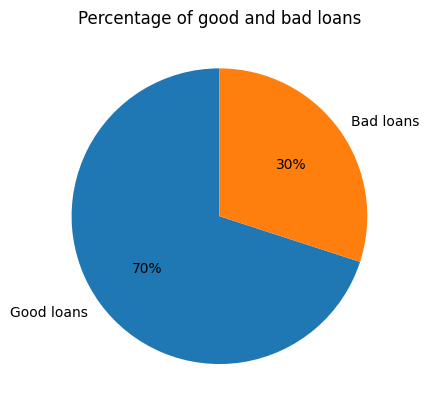

In [8]:
good_bad_per=round(((german_df.target.value_counts()/german_df.target.count())*100))
good_bad_per
plt.pie(good_bad_per,labels=['Good loans', 'Bad loans'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans');

In [9]:
numerical_vars = german_df.select_dtypes(include=['int64', 'float64'])
categorical_vars = german_df.select_dtypes(include=['object'])

number of numeric field:  8


/tmp/ipykernel_7426/757168880.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
/tmp/ipykernel_7426/757168880.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],
/tmp/ipykernel_7426/757168880.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

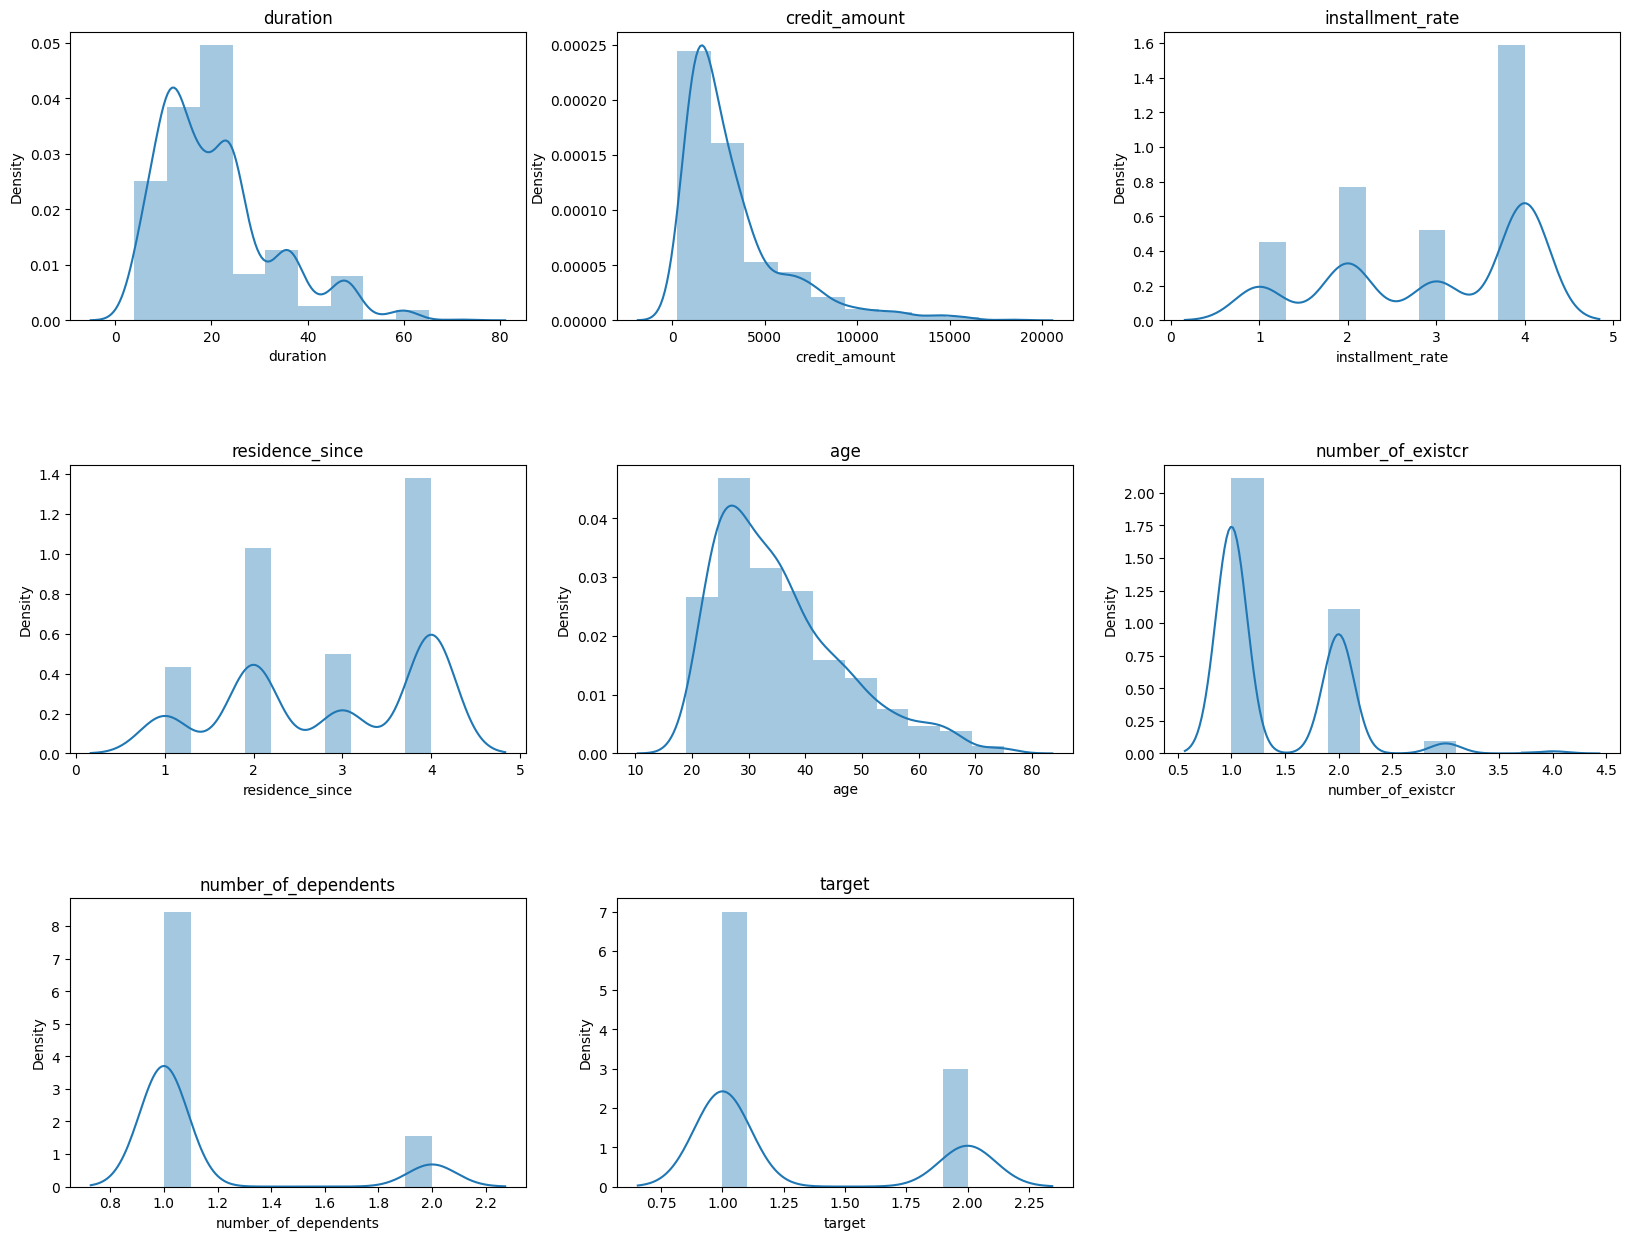

In [10]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = numerical_vars.columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(numerical_vars, numeric_cols)

With 8 numeric variables, we only need to check duration, credit amount, and age to understand the distribution and correlation between them. The other numeric variables are not relevant for this analysis.

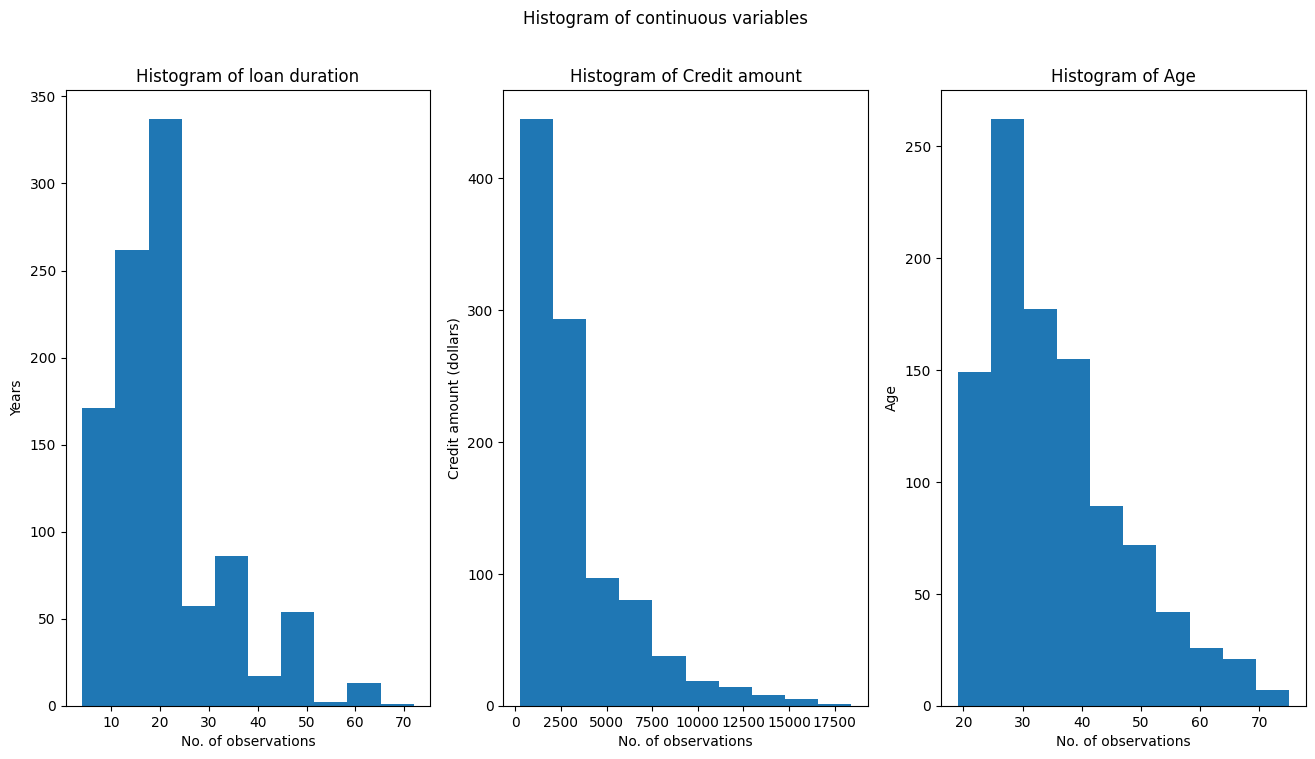

In [11]:
fig, axes = plt.subplots(1,3, figsize=(16,8))
plt.suptitle('Histogram of continuous variables')
axes[0].hist(german_df['duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(german_df['credit_amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount (dollars)')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(german_df['age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Histogram of Age');

In [13]:
sub_df = german_df[['duration', 'credit_amount', 'age']]

In [14]:
## Correlation matrix
correlation_matrix = sub_df.corr()
correlation_matrix

,duration,credit_amount,age
duration,1.000000,0.624984,-0.036136
credit_amount,0.624984,1.000000,0.032716
age,-0.036136,0.032716,1.000000


<Axes: >

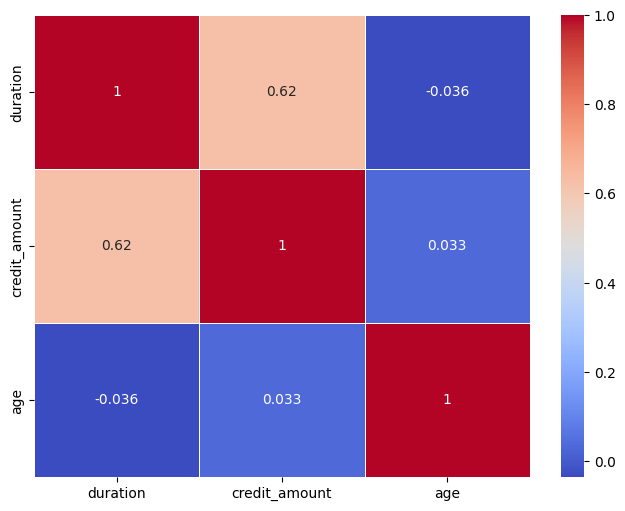

In [16]:
## Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

We can see that the duration and credit amount are positively correlated, which is expected. The age variable is not correlated with duration or credit amount.

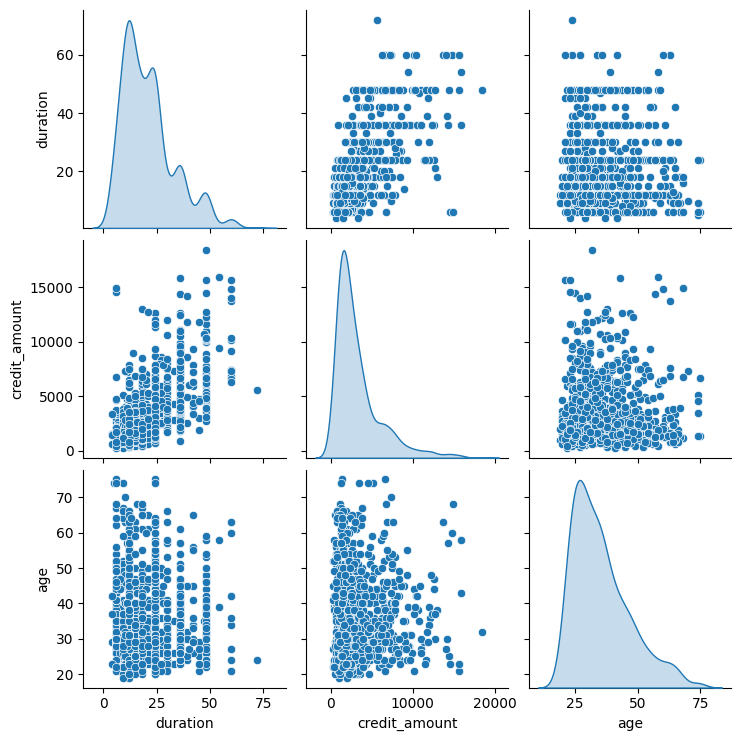

In [27]:
## Pairplot
sns.pairplot(sub_df, diag_kind='kde')

3 numeric variables are right-skewed, which is expected for duration and credit amount. The age variable is also right-skewed, which is expected for a population.

<Axes: xlabel='duration', ylabel='credit_amount'>

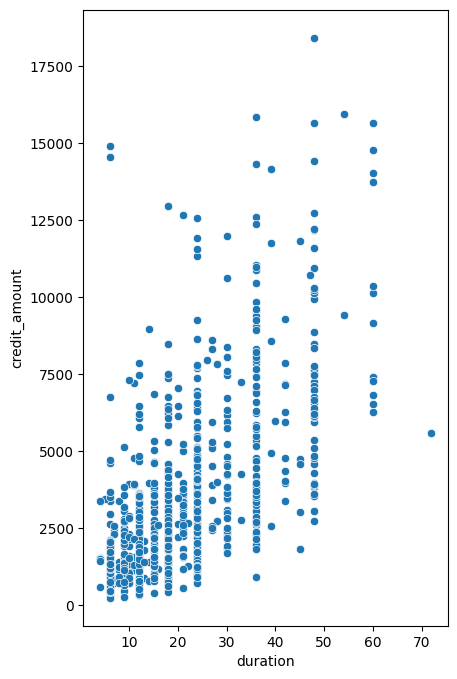

In [26]:
## Scatter plot
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.scatterplot(x='duration',y='credit_amount' ,data=sub_df)


<Axes: xlabel='duration'>

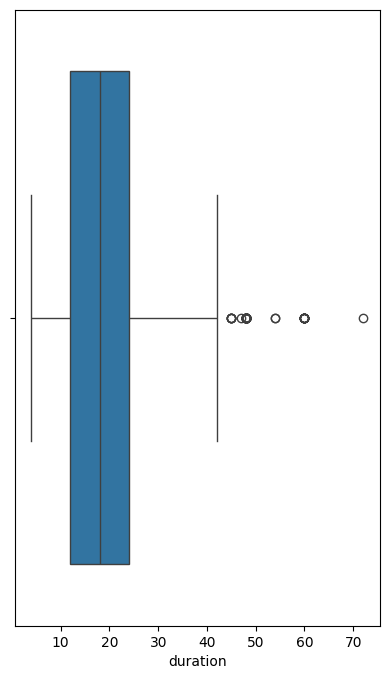

In [28]:
## Boxplot of duration
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.boxplot(x='duration',data=sub_df)

<Axes: xlabel='age'>

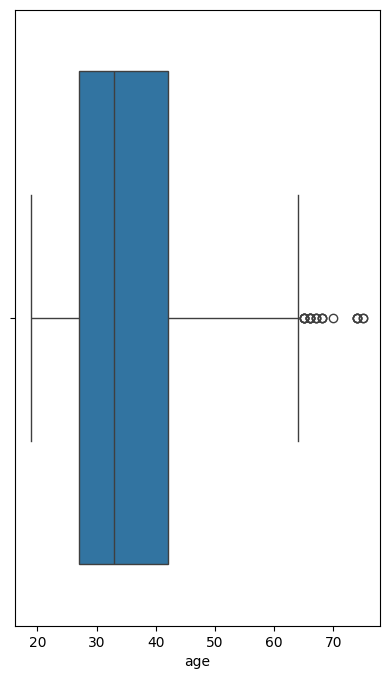

In [29]:
## Boxplot of age
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.boxplot(x='age',data=sub_df)

<Axes: xlabel='credit_amount'>

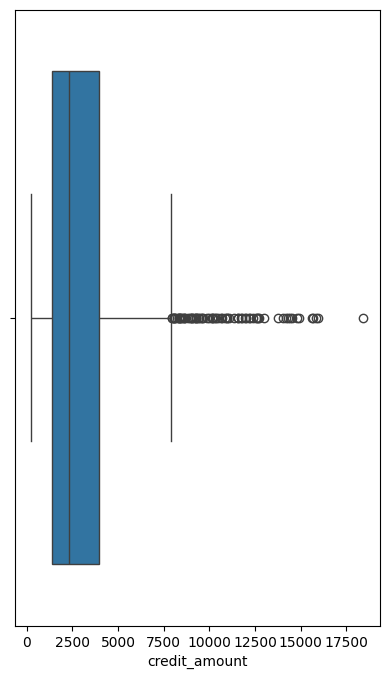

In [30]:
## Boxplot of credit amount
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.boxplot(x='credit_amount',data=sub_df)

We can observe that credit amout which have a lot of outliers.

<Axes: xlabel='age', ylabel='credit_amount'>

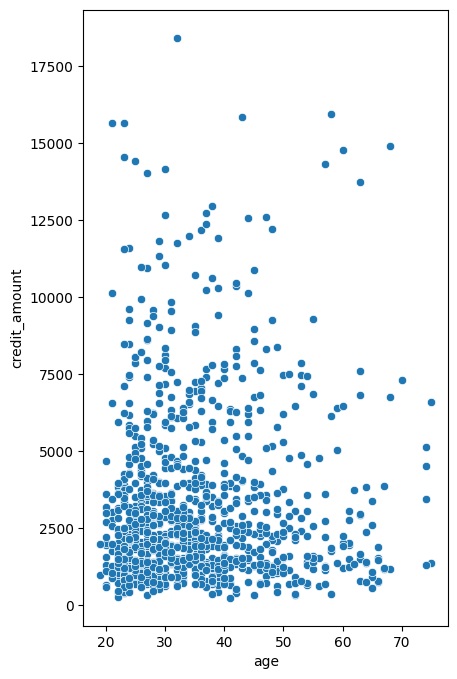

In [31]:
## The range of age follow to credit amount
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.scatterplot(x='age',y='credit_amount' ,data=sub_df)

Most of people are between 20 and 40 years old with credit amount between 0 and 5000. So we can conclude that most of people are young and have low credit amount.

### Find mean, median, and standard deviation of the numeric variables to understand the distribution of the data. (Duy vs Cuong)

Normalize or standardize the numerical variables 

number of category field:  13


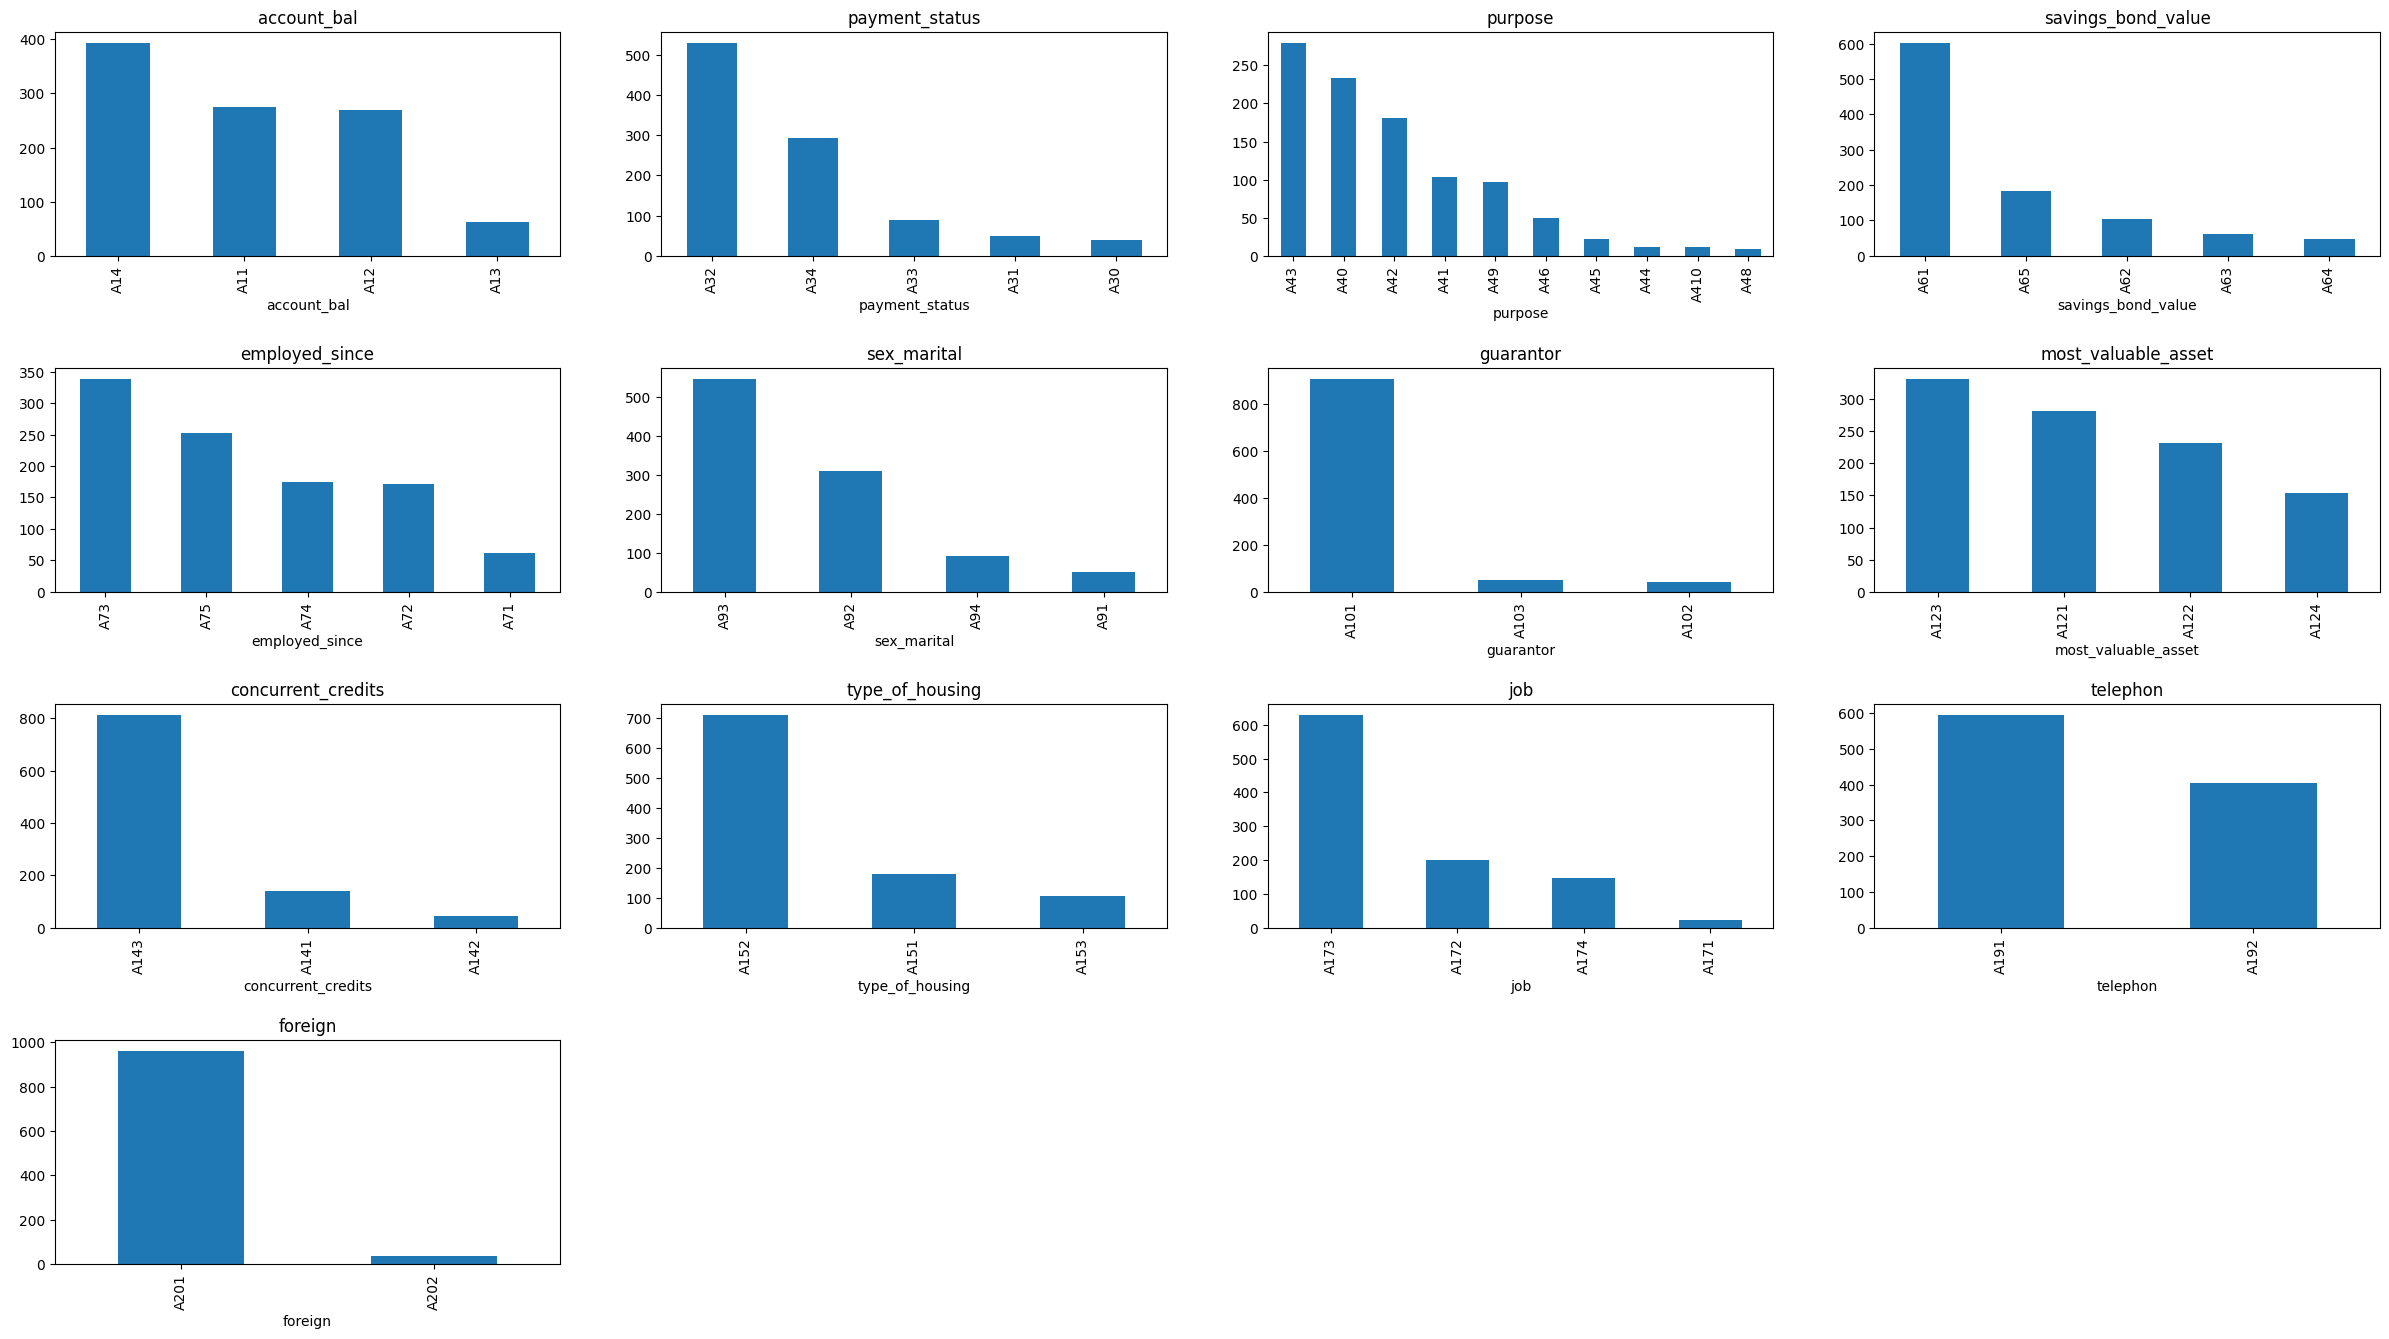

In [12]:
cate_cols = categorical_vars.columns

def _plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (20, 5)):
  '''
  cate_cols: list các tên cột
  row: số lượng dòng trong lưới đồ thị
  col: số lượng cột trong lưới đồ thị
  figsize: kích thước biểu đồ
  '''
  print('number of category field: ', len(cate_cols))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(df, cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(categorical_vars, cate_cols, row = 4, col = 4, figsize = (30, 16))